# Density and Contour Plots

때로는 3차원 데이터를 등고선이나 색으로 구분한 영역을 사용해 2차원으로 표시하는 것이 유용. Matplotlib에서 이 작업을 수행하는데 도움이 되는 세가지 함수를 제공

- plt.contour : 등고선 플롯
- plt.countourf : 색이 채워진 등고선 플롯
- plt.imshow : 이미지 보여줌

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# 사용 가능한 스타일 목록 보기
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('seaborn-v0_8-white')
import numpy as np

### 3차원 함수 시각화하기

$z = f(x, y)$

In [5]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

이 함수는 x값의 격자, y값의 격자, z값의 격자 3가지 인수를 취함

x,y는 플롯에서 위치, z는 등고선 높이를 나타낸다.이러한 데이터를 준비하는 가장 간단한 방식은 1차원 배열로부터 2차원 그리드를 만드는 np.meshgrid함수를 사용하는 것이다.

In [6]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
# X는 행 40개 복사 / Y는 열로 놓고 열 50개 복사
Z = f(X, Y)

In [7]:
print(x.shape)
print(X.shape)
print(y.shape)
print(Y.shape)
print(Z.shape)

(50,)
(40, 50)
(40,)
(40, 50)
(40, 50)


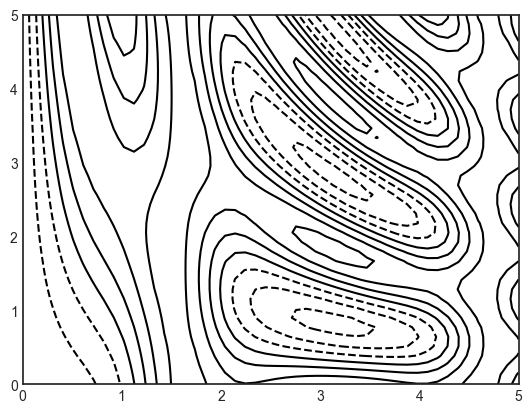

In [8]:
#선으로만 구성된 표준 등고선 플롯
plt.contour(X, Y, Z, colors='black');

In [9]:
# 사용 가능한 색상 리스트 보기
print(dir(plt.cm))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'ColormapRegistry', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'Mapping', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'ScalarMappable', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', '_LUTSIZE', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_api', '_auto_norm_from_scale', '_colormaps', '_ensure_cmap', '_gen_cmap_r

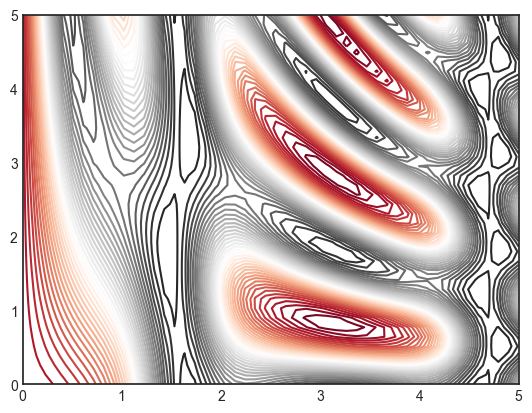

In [10]:
#cmap : color-map (RdBu도 해보기)
# RdGy : Red-Gray / RdBu : Red-Blue
#숫자가 커질수록 등고선 갯수가 늘어남(더 촘촘해짐)
plt.contour(X, Y, Z, 50, cmap='RdGy');

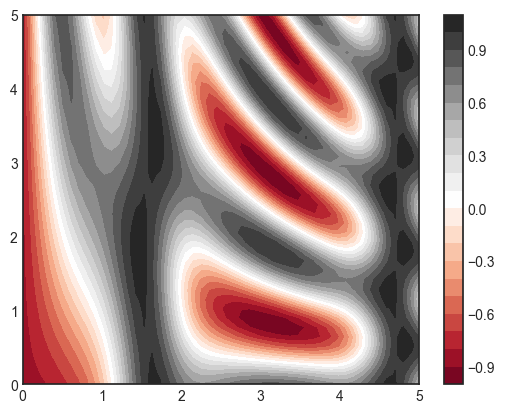

In [11]:
#색이 채워진 등고선
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();

위의 그래프는 색상 단계가 연속적이 아니라 불연속적 

-> 등고선 개수를 아주 큰 숫자로 설정해 완화할 수 있지만 비효율적

-> 이를 처리 하기 위해 2차원 데이터 그리드를 이미지로 해석하는 plt.imshow() 함수를 사용

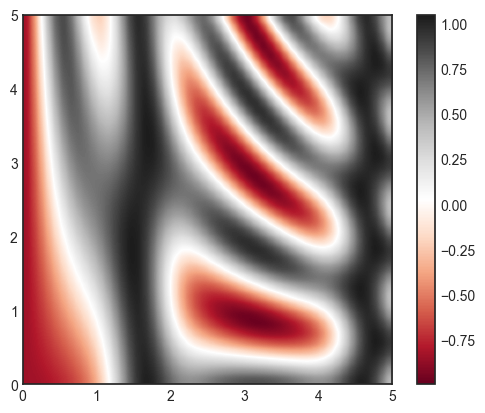

In [17]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy',
           interpolation='gaussian', aspect='equal')
plt.colorbar();

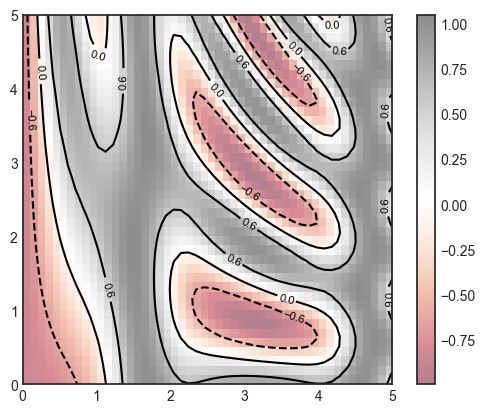

In [18]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();